In [2]:

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import os
import importlib # this is just for me
import ranking_algorithms as ra
import dataset_by_review_bracket as rb
import graph as gr
from data_processing import clean_rank_data, clean_review_data
# %matplotlib inline


# %load_ext autoreload
# %autoreload 2


c:\Users\Neri\Downloads\DSE\DATA_MANAGEMENT\PYTHON\python_project(rankingboardgames)\Source\data_processing.py:10: SyntaxWarning: invalid escape sequence '\{'
  dataset_ranks = pd.read_csv(f'{data_path}\{rank_file}')
c:\Users\Neri\Downloads\DSE\DATA_MANAGEMENT\PYTHON\python_project(rankingboardgames)\Source\data_processing.py:15: SyntaxWarning: invalid escape sequence '\{'
  dataset_reviews = pd.read_csv(f'{data_path}\{file_reviews}')


c:\Users\Neri\Downloads\DSE\DATA_MANAGEMENT\PYTHON\python_project(rankingboardgames)\Source\data


In [25]:
importlib.reload(gr)

<module 'graph' from 'c:\\Users\\Neri\\Downloads\\DSE\\DATA_MANAGEMENT\\PYTHON\\python_project(rankingboardgames)\\Source\\graph.py'>

In [3]:
clean_rank_data.columns

Index(['ID', 'Name', 'Rank', 'Average', 'Number of Ratings'], dtype='object')

In [5]:
filtered_dataset_by_wilson = rb.dataset_by_review_bracket('most_reviewed', clean_rank_data, clean_review_data, ra.wilson_function, 'greater', 80000)
most_reviewed_games = filtered_dataset_by_wilson.add_column_to_df_filtered_by_reviews('Wilson function')
most_reviewed_games.sort_values('Wilson function', ascending = False) # to display in df form, this is already included in the bar graph situation.



,Wilson function,ID,Name,Rank,Average,Number of Ratings
3,0.96,68448,7 Wonders,73,7.74,89982
0,0.94,30549,Pandemic,106,7.59,108975
1,0.93,822,Carcassonne,190,7.42,108738
4,0.93,36218,Dominion,104,7.61,81561
2,0.88,13,Catan,429,7.14,108024


In [7]:
most_reviewed_games.sort_values('Average', ascending = False)

,Wilson function,ID,Name,Rank,Average,Number of Ratings
3,0.96,68448,7 Wonders,73,7.74,89982
4,0.93,36218,Dominion,104,7.61,81561
0,0.94,30549,Pandemic,106,7.59,108975
1,0.93,822,Carcassonne,190,7.42,108738
2,0.88,13,Catan,429,7.14,108024


In [ ]:
most_reviewed_graph = gr.graph('most_reviewed_games_by_wilson', most_reviewed_games, 'Wilson function', 'n')
# type(most_reviewed_graph)

graph.graph

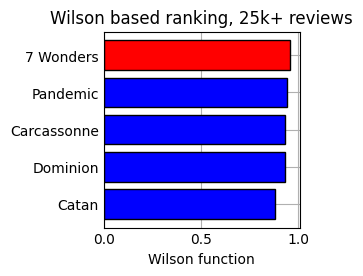

In [27]:
most_reviewed_graph.horizontal_bar_graph('Wilson based ranking, 25k+ reviews')

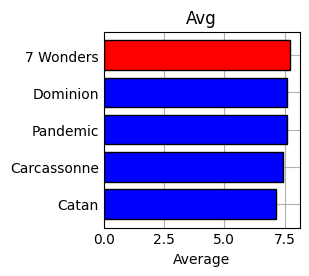

In [6]:
avg_graph = gr.graph('avg', most_reviewed_games, 'Average', 'n')
avg_graph.horizontal_bar_graph('Avg')

In [ ]:
filtered_dataset_by_bayes = rb.dataset_by_review_bracket('in between reviewed', clean_rank_data, clean_review_data, ra.bayesian_average, 'between', 3900)
mid_reviewed_games = filtered_dataset_by_bayes.add_column_to_df_filtered_by_reviews('New Bayesian Average', 4000)
mid_reviewed_games.sort_values('New Bayesian Average', ascending = False)


In [ ]:
# 1. function doesn't work automatically (this just may not be as big of a problem as I think it is.
# 2. The dataset functions can't be in the same place. or can they? I'd have to create two objects no>
# I can modify the statistical functions so they run over any dataset by themselves, the object is for the distribution.

# when it comes to building my steps though there's still problem #2 and there's no way I can just use the function as before.
# I may save those not as objects but simply as functions in a module useful for that purpose.

# I would like to maintain objects, but the graph thing will definetely be an object so, maybe it's worth a shot. let's see. 

# the names are useless.


In [ ]:
# there's a lot to do.
# polish the dataset class with the restricted reviews and do the wilson score/ bayesian thing for it
# create the graph class for each one. should be doable.



In [4]:
# almost 19 Million users
# from the column users I  want rows where a user has rated at least 10 games
# So I want to find all the users who appear less than a certain amount of times and take them out of my datasets 
# so I can look at their ranking
def top_user(dataset, number_of_top_users):
    
    # I want to say from this column of users 
    # if a user has appeared less than ten times drop them
    user_appearance = dataset['User'].value_counts()
    
    for user in user_appearance:
        
        if value < 10:
            top_users = dataset.drop(user, axis = 0)
    
    return top_users



In [ ]:
x = clean_review_data['User'].value_counts()

y = x[x>1000]
y

In [ ]:
y = clean_review_data[x>1000]
# the og dataset but only with

In [ ]:
top_user_dataset = clean_review_data['User']
# the dataset ofa user

In [ ]:
# for every user in the counts, I want the corresponding amount of times they have rated a game. I got that.
# if this value is less than a certain amount I want this value removed from the review dataset.

for user in x:
    print(user)

In [ ]:
avg_user_appearance = np.average(x.values)
avg_user_appearance
# clean for ratings above 10 blow 0
# nulls and duplicates

np.float64(45.94004820561268)

In [ ]:
# def side_by_side_graphs(graph_left, graph_right):
#     fig, ax = plt.subplots(1, 2)
#     ax[0] = graph_left
#     ax[1] = graph_right
    
#     return plt.show

# New_Column, USELESS now.
def New_Column(dataset, function):
    # create an empty list (our future column)
    New_column = []
    # for each row in a dataset I have to find its ID and apply a the funciton over it
    for id in dataset['ID'].unique():
        New_column.append(function(id))
    
    return New_column